In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

In [2]:
start = '2012-01-01'
end = '2022-10-14'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540048
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607435
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747403
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880661
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-10,141.889999,138.570007,140.419998,140.419998,74899000.0,140.419998
2022-10-11,141.350006,138.220001,139.899994,138.979996,77033700.0,138.979996
2022-10-12,140.360001,138.160004,139.130005,138.339996,70433700.0,138.339996
2022-10-13,143.589996,134.369995,134.990005,142.990005,113224000.0,142.990005
2022-10-14,144.520004,138.190002,144.309998,138.380005,88512300.0,138.380005


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540048
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607435
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747403
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880661
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234


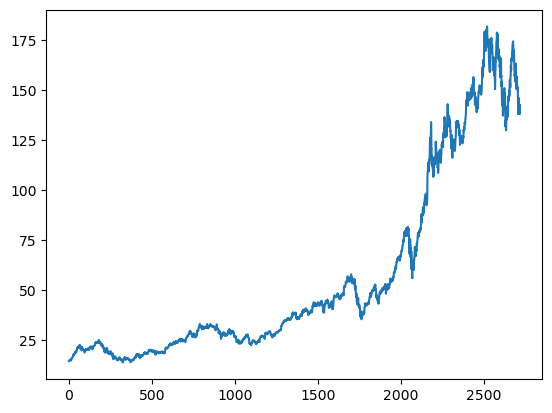

In [5]:
plt.plot(df.Close)

In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,14.732143,14.607143,14.621429,14.686786,302220800.0
1,14.810000,14.617143,14.642857,14.765714,260022000.0
2,14.948214,14.738214,14.819643,14.929643,271269600.0
3,15.098214,14.972143,14.991786,15.085714,318292800.0
4,15.276786,15.048214,15.196429,15.061786,394024400.0


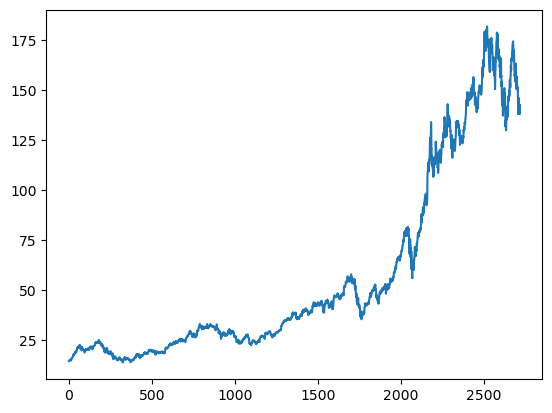

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2710    151.2350
2711    151.2166
2712    151.2265
2713    151.2805
2714    151.2332
Name: Close, Length: 2715, dtype: float64

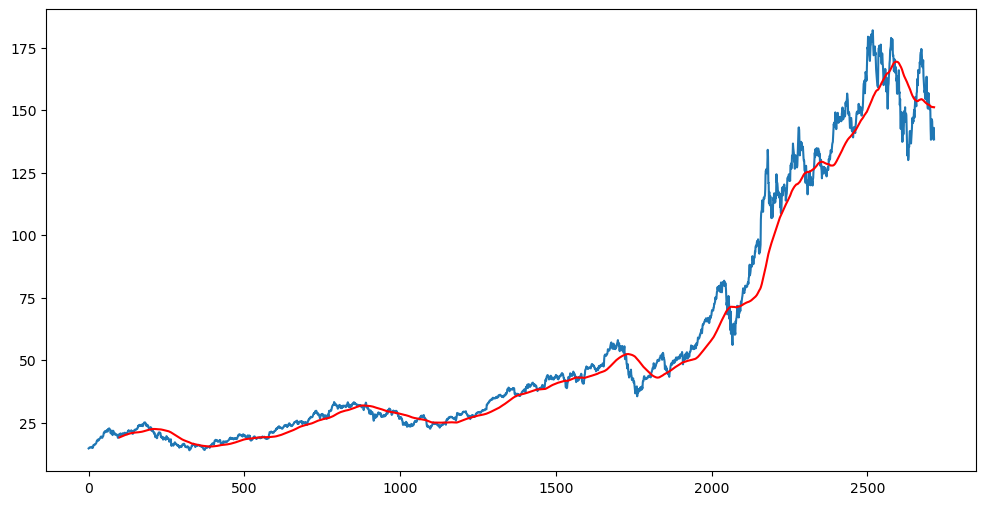

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2710    158.96070
2711    158.77420
2712    158.56425
2713    158.38275
2714    158.17775
Name: Close, Length: 2715, dtype: float64

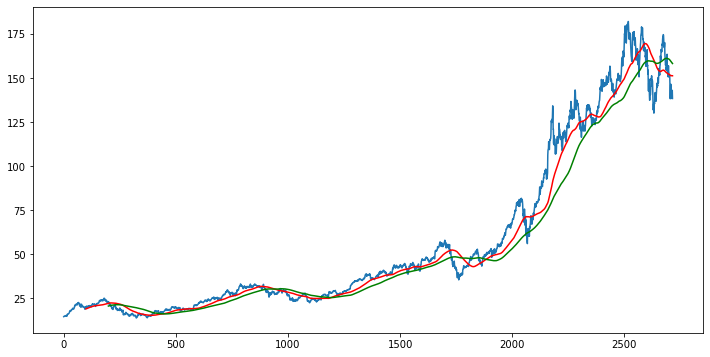

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(2715, 5)

In [12]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
                                        
print(data_training.shape)
print(data_testing.shape)

(1900, 1)
(815, 1)


In [13]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [14]:
data_testing.head()

,Close
1900,52.167500
1901,51.755001
1902,51.935001
1903,52.419998
1904,52.195000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.832766  ],
       [0.85903106],
       [0.86822095]])

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
    

In [18]:
x_train.shape

(1800, 100, 1)

In [ ]:
# ML Model

In [19]:
from keras.layers import Dense  
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
57/57 [==============================] - 68s 840ms/step - loss: 0.0074
Epoch 2/50
57/57 [==============================] - 36s 628ms/step - loss: 0.0061
Epoch 3/50
57/57 [==============================] - 36s 631ms/step - loss: 0.0050
Epoch 4/50
57/57 [==============================] - 44s 774ms/step - loss: 0.0047
Epoch 5/50
57/57 [==============================] - 56s 990ms/step - loss: 0.0044
Epoch 6/50
57/57 [==============================] - 107s 2s/step - loss: 0.0046
Epoch 7/50
57/57 [==============================] - 81s 1s/step - loss: 0.0044
Epoch 8/50
57/57 [==============================] - 127s 2s/step - loss: 0.0040
Epoch 9/50
57/57 [==============================] - 152s 3s/step - loss: 0.0041
Epoch 10/50
57/57 [==============================] - 186s 3s/step - loss: 0.0034
Epoch 11/50
57/57 [==============================] - 181s 3s/step - loss: 0.0039
Epoch 12/50
57/57 [==============================] - 49s 839ms/step - loss: 0.0038
Epoch 13/50
57/57 [=======

In [23]:
model.save('keras_model.h5')

In [24]:
data_testing.head()

,Close
1900,52.167500
1901,51.755001
1902,51.935001
1903,52.419998
1904,52.195000


In [25]:
data_testing.tail(100)

,Close
2615,140.360001
2616,140.520004
2617,143.779999
2618,149.639999
2619,148.839996
...,...
2710,140.419998
2711,138.979996
2712,138.339996
2713,142.990005


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [28]:
final_df.head()

,Close
0,43.742500
1,43.962502
2,43.882500
3,43.630001
4,43.125000


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[4.44612686e-03],
       [6.03018007e-03],
       [5.45415073e-03],
       [3.63610965e-03],
       [0.00000000e+00],
       [7.38027286e-04],
       [1.15203120e-02],
       [1.51384311e-02],
       [1.65784769e-02],
       [2.02145591e-02],
       [2.45166786e-02],
       [2.79367910e-02],
       [2.52547059e-02],
       [2.81887970e-02],
       [4.06631336e-02],
       [3.33909418e-02],
       [2.92328296e-02],
       [2.57227092e-02],
       [2.87468082e-02],
       [2.91968209e-02],
       [3.14108753e-02],
       [3.37329557e-02],
       [3.87370939e-02],
       [4.11311643e-02],
       [4.17431749e-02],
       [4.41012366e-02],
       [4.96814040e-02],
       [4.86013628e-02],
       [5.06174105e-02],
       [4.76113295e-02],
       [4.74673222e-02],
       [4.81153414e-02],
       [4.81513501e-02],
       [5.51355548e-02],
       [5.64495839e-02],
       [5.76556144e-02],
       [6.29657578e-02],
       [6.23897560e-02],
       [5.90056523e-02],
       [5.72416105e-02],


In [30]:
input_data.shape

(915, 1)

In [31]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])   

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(815, 100, 1)
(815,)


In [39]:
# For making predictions

y_predicted = model.predict(x_test)

26/26 [==============================] - 5s 208ms/step


In [40]:
y_predicted.shape

(815, 1)

In [41]:
y_test

array([0.06510782, 0.06213775, 0.06343379, 0.06692586, 0.06530583,
       0.07297403, 0.0646758 , 0.0567376 , 0.03751305, 0.04410124,
       0.04777333, 0.05567555, 0.05128345, 0.0503654 , 0.06564784,
       0.05445153, 0.05263349, 0.06120172, 0.06813192, 0.06814991,
       0.07225402, 0.07193003, 0.05425352, 0.06118373, 0.0569896 ,
       0.05945566, 0.06571983, 0.06523384, 0.05976167, 0.06604386,
       0.07340606, 0.07337005, 0.0750081 , 0.07956223, 0.09196457,
       0.09106455, 0.08325233, 0.08532238, 0.08676243, 0.09048854,
       0.08723046, 0.08141628, 0.08319834, 0.08132627, 0.08735645,
       0.08530439, 0.08337835, 0.0926486 , 0.09376462, 0.08363036,
       0.08697845, 0.09812074, 0.09821075, 0.09342261, 0.09815675,
       0.1036649 , 0.11468123, 0.11406919, 0.11307918, 0.11136911,
       0.11300717, 0.11504123, 0.12242142, 0.12143142, 0.12722755,
       0.12794759, 0.13334774, 0.13779387, 0.12742556, 0.12737156,
       0.13727184, 0.14998022, 0.15300429, 0.15233828, 0.15253

In [42]:
y_predicted

array([[0.07844274],
       [0.0788711 ],
       [0.07935277],
       [0.07986158],
       [0.08039248],
       [0.08093588],
       [0.08151038],
       [0.08210114],
       [0.08261651],
       [0.08289769],
       [0.08284393],
       [0.08247   ],
       [0.08188336],
       [0.08119529],
       [0.08048032],
       [0.07986721],
       [0.07942811],
       [0.07913628],
       [0.07899445],
       [0.07904685],
       [0.07931812],
       [0.07981059],
       [0.08050475],
       [0.08126123],
       [0.08194157],
       [0.08246219],
       [0.0827814 ],
       [0.08294111],
       [0.08300832],
       [0.08300874],
       [0.0829843 ],
       [0.08302666],
       [0.08320849],
       [0.08356389],
       [0.08411923],
       [0.08494747],
       [0.08609134],
       [0.08747201],
       [0.088975  ],
       [0.09050474],
       [0.092004  ],
       [0.09341276],
       [0.09463759],
       [0.095621  ],
       [0.0963196 ],
       [0.09678654],
       [0.09708843],
       [0.097

In [43]:
scaler.scale_

array([0.0072002])

In [44]:
scale_factor = 1/0.0072002
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

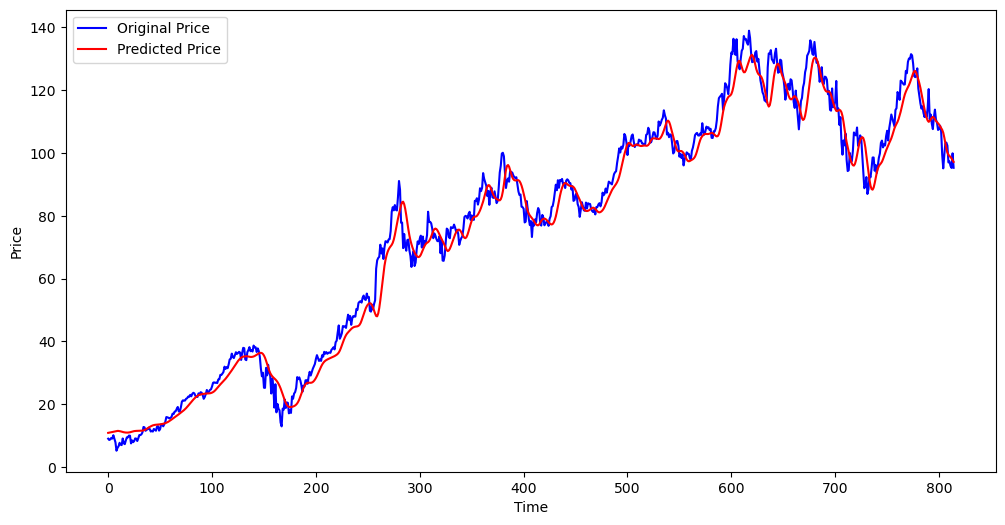

In [46]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()